In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv('./data/teams.csv')

In [3]:
# Create label
data = data.sort_values(['franchID', 'year'])
data['playoffNextYear'] = data['playoff'].shift(-1)
data.loc[data['franchID'] != data['franchID'].shift(-1), 'playoffNextYear'] = None
data.dropna(subset='playoffNextYear', inplace=True)

In [4]:
features = ['rank', 'o_fgm', 'o_ftm', 'o_3pm', 'o_reb', 'o_asts', 'o_pts']
label = 'playoffNextYear'

In [5]:
train_data = data[data['year'] <= 5]
test_data = data[data['year'].isin([6, 7])].copy()

In [6]:
x_train, y_train = train_data[features], train_data[label]
x_test, y_test = test_data[features], test_data[label]

In [7]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
test_data['predict'] = model.predict(x_test)
print(accuracy_score(y_test, test_data['predict']))

0.5769230769230769


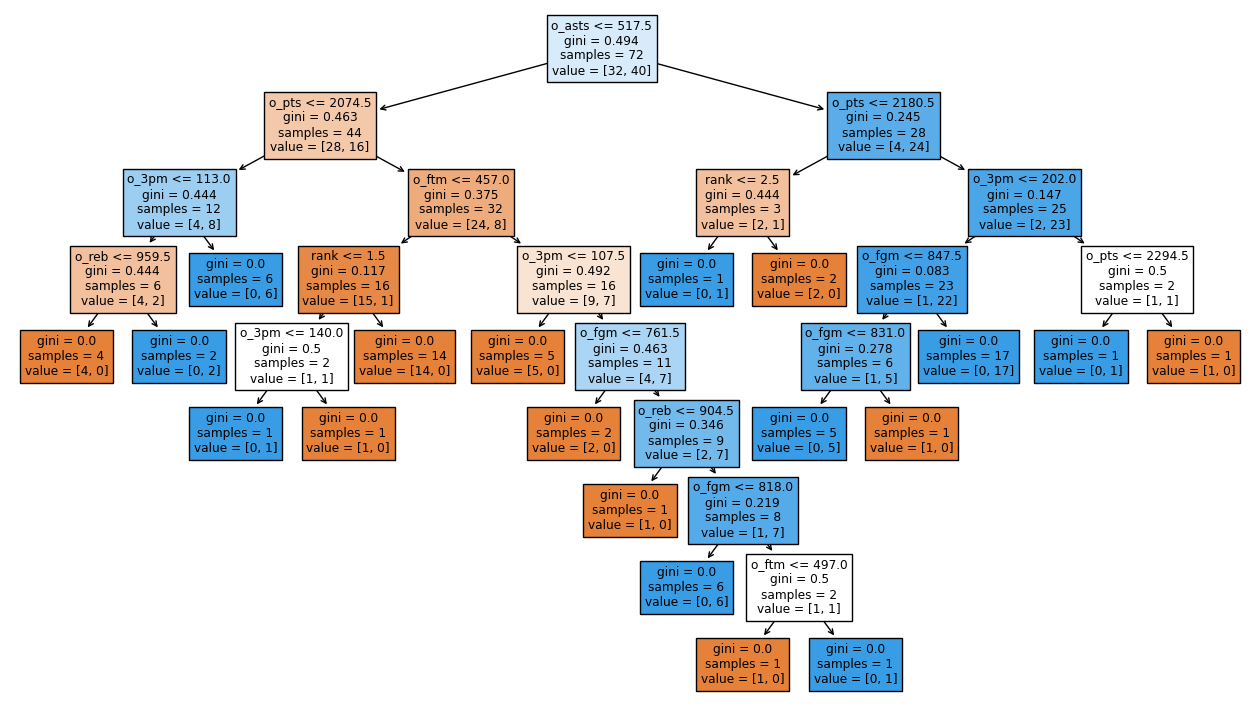

In [11]:
plot_tree(model, feature_names=features, filled=True);

In [9]:
plt.rcParams['figure.figsize'] = (16, 9)